In [2]:
import numpy as np


dataset = np.array([[0.245,0],
                    [0.247,0],
                    [0.285,1],
                    [0.299,1],
                    [0.327,1],
                    [0.347,1],
                    [0.356,0],
                    [0.36,1],
                    [0.363,0],
                    [0.364,1],
                    [0.398,0],
                    [0.4,1],
                    [0.409,0],
                    [0.421,1],
                    [0.432,0],
                    [0.473,1],
                    [0.509,1],
                    [0.529,1],
                    [0.561,0],
                    [0.569,0],
                    [0.594,1],
                    [0.638,1],
                    [0.656,1],
                    [0.816,1],
                    [0.853,1],
                    [0.938,1],
                    [1.036,1],
                    [1.045,1],
                    ])
# preprocessing dataset
x1 = dataset[:,0]
x2 =x1**2
y = dataset[:,1]

In [3]:
def sigmoid_func(z):
  return 1/(1+np.exp(-z))

In [4]:
def predict(theta0, theta1, theta2, x1,x2):
  h = theta0+ theta1*x1 + theta2*x2
  return sigmoid_func(h)

In [17]:
def cost_function(theta0, theta1,theta2, x1, x2, y_true):
  epsilon = 1e-15
  lambda_in = 0.5
  m = len(x1)
  y_pred = predict(theta0, theta1,theta2, x1,x2)
  J = (-1/m)*np.sum(y_pred*(np.log(y_pred+epsilon))+(1-y_true)*np.log(1-y_pred+epsilon)) +(1/(2*m))*lambda_in*(theta1**2+theta2**0)
  return J

In [18]:
# Calculating gradient_descent
def gradient_descent(theta0, theta1,theta2, x1, x2, y, learning_rate,epochs, lambda_in):
  m = len(x1)
  for i in range(epochs):
    gradient0 = (1/m)*np.sum(predict(theta0,theta1,theta2,x1,x2)- y)
    gradient1 = (1/m)*np.sum((predict(theta0,theta1,theta2, x1, x2) - y )*x1)+(lambda_in/m)*theta1
    gradient2 = (1/m)*np.sum((predict(theta0,theta1,theta2, x1, x2) - y )*x2)+(lambda_in/m)*theta2
    n_theta0 = theta0 - learning_rate*gradient0
    n_theta1 = theta1 - learning_rate*gradient1
    n_theta2 = theta2 - learning_rate*gradient2
    cost = cost_function(theta0, theta1,theta2, x1,x2,y)
  return n_theta0, n_theta1,n_theta2, cost

In [54]:
# Initial parameters
np.random.seed()
theta0 = np.random.rand()
theta1 = np.random.rand()
theta2 = np.random.rand()
learning_rate = 1e-4
epochs = 10000
lambda_in =0.5


In [55]:
# Value of theta and cost
t0,t1,t2, cost = gradient_descent(theta0, theta1,theta2, x1, x2, y, learning_rate,epochs, lambda_in)
print(t0,t1,t2, cost)

0.4356681445343209 0.6088020340547624 0.09617849120030517 0.6242592412622476


In [56]:
def predictation(t0,t1,t2, x):
  value = predict(t0,t1,t2, x,x**2)
  if value >= 0.5:
    print('present')
  else: print('absent')

In [57]:
predictation(t0,t1,t2,0.56)

present


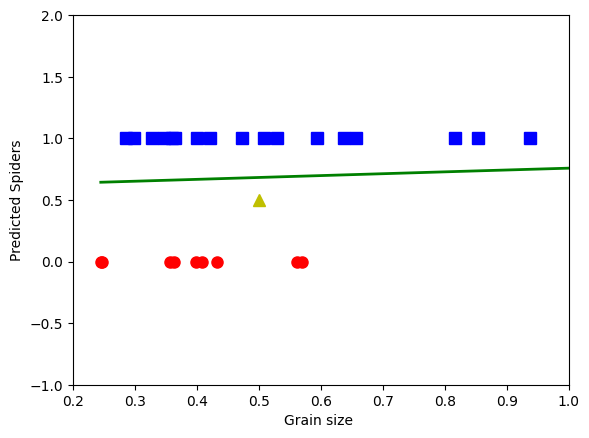

In [58]:
#Visualizing the dataset being classified
import matplotlib.pyplot as plt

X= np.expand_dims(x1,0)
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]
plt.axis([0.2, 1, -1, 2])
plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)




threshold = 0.5
yy = sigmoid_func(t0 +t1*x1+t2*(x1**2))
plt.axis([0.2, 1, -1, 2])
plt.plot(x1, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('Grain size ')
plt.ylabel('Predicted Spiders')
plt.show()